<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/sgd_using_pytorch/blob/master/sgdwithpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n = 100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.1879,  1.0000],
        [-0.3324,  1.0000],
        [ 0.8215,  1.0000],
        [-0.3126,  1.0000],
        [ 0.9719,  1.0000]])

In [4]:
a = tensor(3.,2);a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

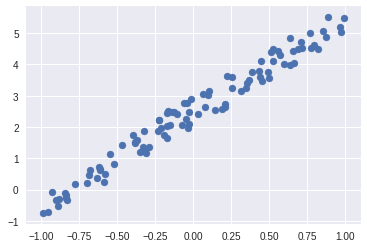

In [6]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat - y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat,y)

tensor(6.9631)

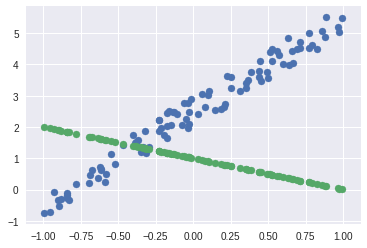

In [10]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

In [11]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10 == 0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()
  

In [13]:
lr = 1e-1
for t in range(100):
  update()

tensor(6.9631, grad_fn=<MeanBackward1>)
tensor(1.4991, grad_fn=<MeanBackward1>)
tensor(0.4942, grad_fn=<MeanBackward1>)
tensor(0.2036, grad_fn=<MeanBackward1>)
tensor(0.1176, grad_fn=<MeanBackward1>)
tensor(0.0921, grad_fn=<MeanBackward1>)
tensor(0.0845, grad_fn=<MeanBackward1>)
tensor(0.0823, grad_fn=<MeanBackward1>)
tensor(0.0816, grad_fn=<MeanBackward1>)
tensor(0.0814, grad_fn=<MeanBackward1>)


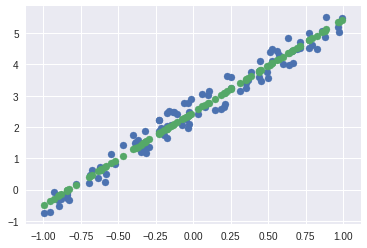

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)